In [15]:
from PIL import Image, ImageEnhance, ImageFilter

In [16]:
img1 = Image.open("img/DK1.jpg")

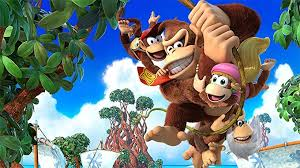

In [17]:
img1

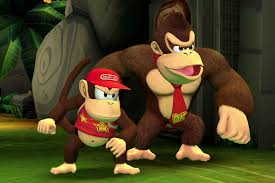

In [6]:
img2 = Image.open("img/DK2.jpg")
img2

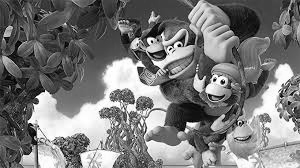

In [18]:
gray_img = img1.convert("L")
gray_img

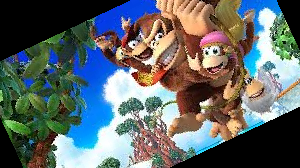

In [20]:
rotated_img = img1.rotate(25)
rotated_img

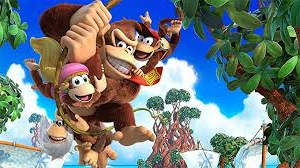

In [21]:
transpose_img = img1.transpose(Image.FLIP_LEFT_RIGHT)
transpose_img

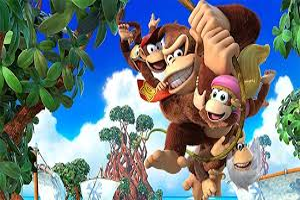

In [11]:
resize_img_small = img1.resize((300,200))
resize_img_small

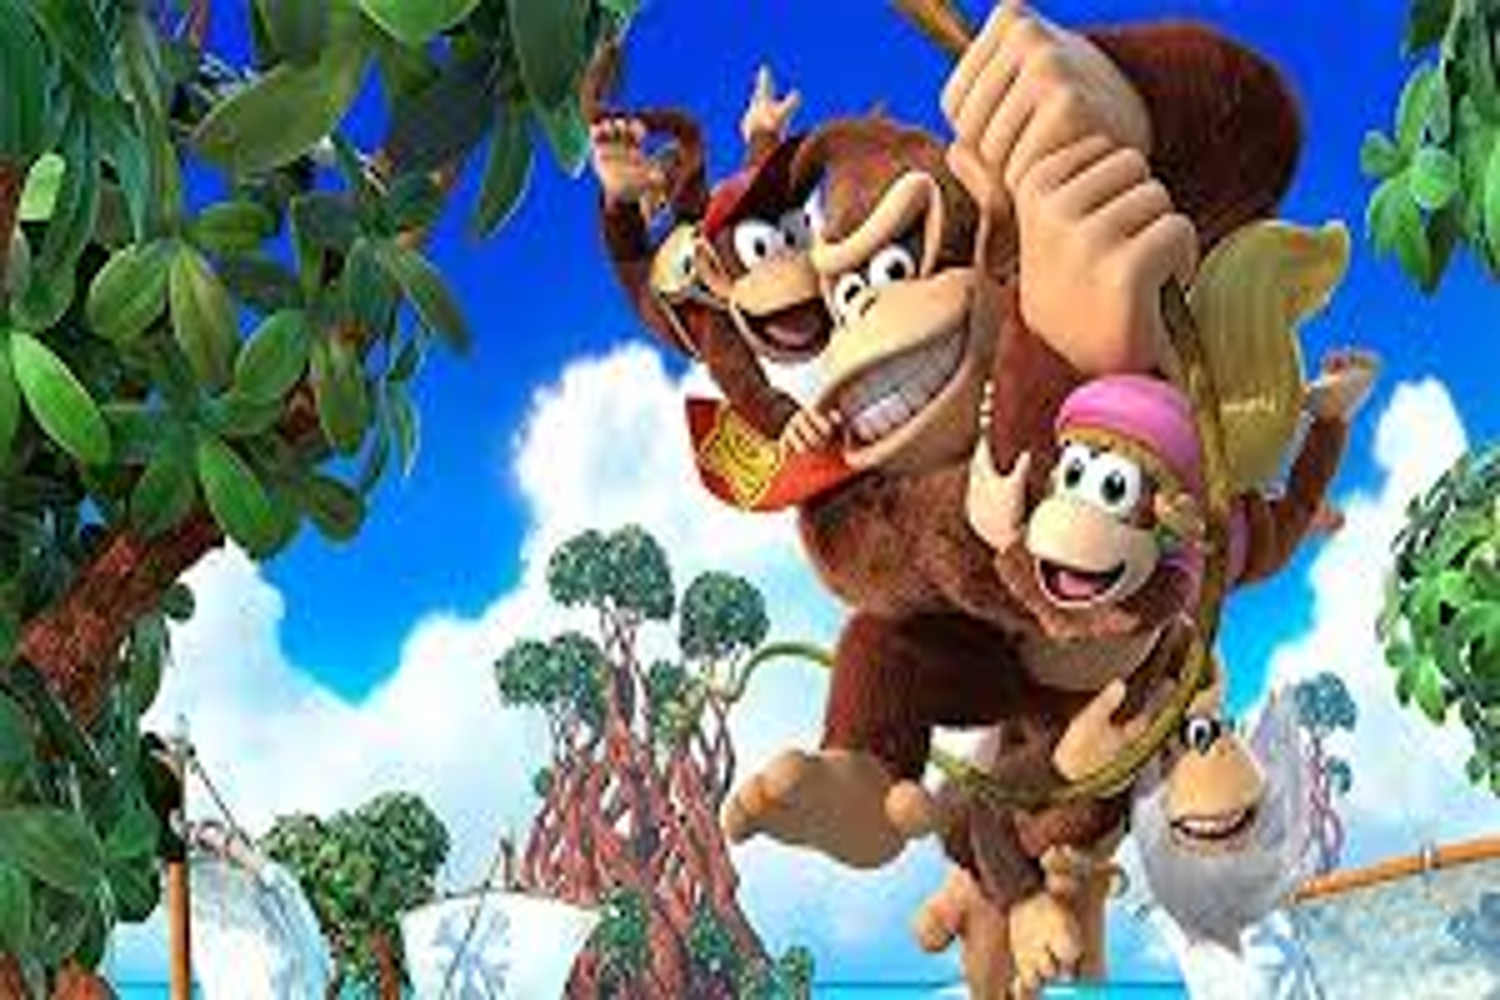

In [12]:
resize_img_big = img1.resize((1500,1000))
resize_img_big

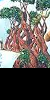

In [13]:
dim = (100, 100, 150, 200)
crop_img= img1.crop(dim)
crop_img

Brilho, Contraste, Nitidez

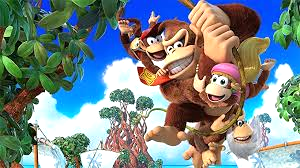

In [14]:
enhancer = ImageEnhance.Brightness(img1)
bright_img = enhancer.enhance(1.1)
bright_img

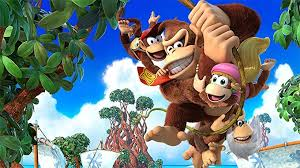

In [24]:
enhancer = ImageEnhance.Contrast(img1)
contrast_img = enhancer.enhance(1)
contrast_img

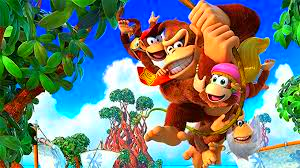

In [25]:
enhancer = ImageEnhance.Color(img1)
saturation_img = enhancer.enhance(2)
saturation_img

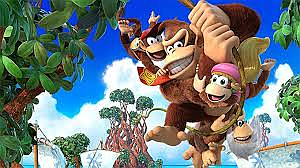

In [26]:
enhancer = ImageEnhance.Sharpness(img1)
sharpness_img = enhancer.enhance(2)
sharpness_img

Usando Filtro

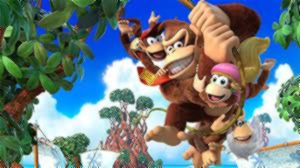

In [27]:
filtro_blur = img1.filter(ImageFilter.SMOOTH)
filtro_blur

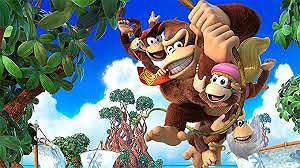

In [28]:
filtro_detail = img1.filter(ImageFilter.DETAIL)
filtro_detail

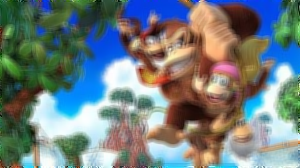

In [29]:
filtro_blur = img1.filter(ImageFilter.BLUR)
filtro_blur

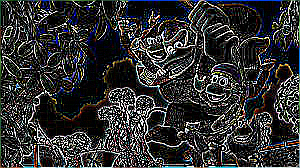

In [30]:
filtro_edge = img1.filter(ImageFilter.FIND_EDGES)
filtro_edge

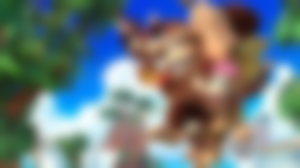

In [31]:
filtro_gaussian_blur= img1.filter(ImageFilter.GaussianBlur(radius=5))
filtro_gaussian_blur

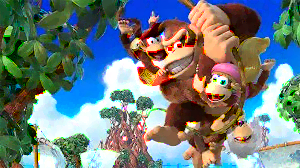

In [32]:
paint_img = img1.filter(ImageFilter.ModeFilter(size=5))
paint_img

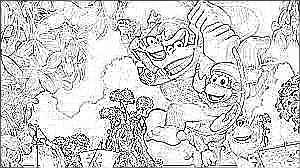

In [33]:
pencil_img = img1.convert("L").filter(ImageFilter.CONTOUR)
pencil_img

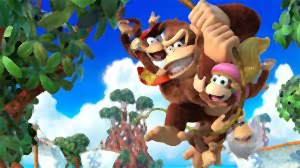

In [34]:
denoised_img = img1.filter(ImageFilter.MedianFilter(size=3))
denoised_img

In [ ]:
Escrevendo Texto em Imagem

In [35]:
from PIL import ImageDraw, ImageFont

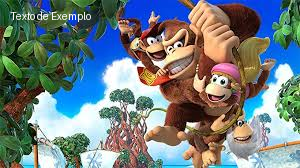

In [36]:
text_img = img1.copy()
draw = ImageDraw.Draw(text_img)
font = ImageFont.load_default()
draw.text((10,10), "Texto de Exemplo", fill = 'white', font = font)
text_img

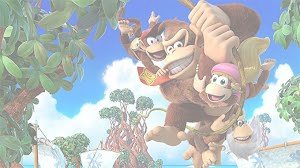

In [37]:
rgba_img = img1.convert("RGBA")
data = rgba_img.getdata()
#Criando uma nova imagem com transparência
new_data = []
for item in data:
    #Mudando a opacidade
    new_data.append((item[0], item[1], item[2], 128))#50% de transparência
rgba_img.putdata(new_data)
rgba_img

Aplicando filtro de Sepia

In [38]:
import numpy as np

In [49]:
def apply_sepia(img):
    sepia_img = img.convert('RGB')
    width, height = sepia_img.size
    pixels=sepia_img.load()

    for py in range(height):
        for px in range(width):
            r, g, b = pixels[px, py]
            tr = int (0.393* r + 0.769 * g + 0.189 * b)
            tg = int (0.393* r + 0.686 * g + 0.168 * b)
            tb = int (0.272* r + 0.534 * g + 0.131 * b)

            tr = min(255, tr)
            tg = min(255, tg)
            tb = min(255, tb)

            pixels[px, py] = (tr, tg, tb)
    return sepia_img
sepia_img = apply_sepia(img1)
sepia_img.show()

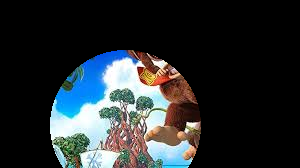

In [47]:
mask = Image.new('L', img1.size, 0)
draw = ImageDraw.Draw(mask)
draw.ellipse((50, 50, 200,200), fill=255)
masked_img = Image.composite(img1, Image.new('RGB', img1.size, (0,0,0)), mask)
masked_img

Ajustando a exposição em 3D

In [22]:
def adjust_exposure(img, factor):
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(factor)

from PIL import ImageOps

def adjust_gamma(img, gamma):
    return ImageOps.autocontrast(img, cutoff =0)

exposure_img = adjust_exposure(img1, 1.5)
exposure_img.show()

In [23]:
#Imagem 3d
from PIL import ImageChops

left_img = img1.copy()
right_img = img1.copy()

red_channel = ImageChops.offset(left_img.getchannel('R'), 5, 0)
green_channel = ImageChops.offset(right_img.getchannel('G'), -5, 0)

anaglyph_img = Image.merge('RGB',(red_channel, green_channel, left_img.getchannel( 'B')))
anaglyph_img.show()